In [245]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import pickle
import os
import cv2
import random
import time
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split

In [246]:
Name='Face-recognition_CNN-{}'.format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(Name))

In [247]:
data_dir='/Users/aryn/Downloads/CoreML/OpenCV/images'
categories=['Amit','Ankit','Aryan','Saket','Taha','Vishal','Yashraj']
# data_dir='/Users/aryn/Downloads/test_set'
# categories=['cats','dogs']

In [248]:
gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess=tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

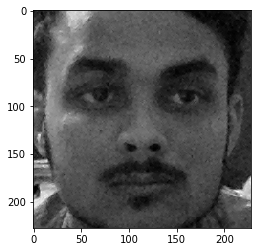

In [249]:
for i in categories:
    path=os.path.join(data_dir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

(50, 50)


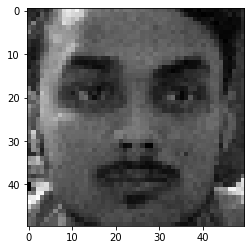

In [250]:
img_size=50
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
print(new_array.shape)
plt.show()

In [251]:
training_data = []
def training():
    for i in categories:
        path=os.path.join(data_dir,i)
        class_num=categories.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
                #print(e)
training()

In [252]:
print(len(training_data))

1289


In [253]:
import random
random.shuffle(training_data)

In [254]:
for sample in training_data[:10]:
    print(sample[1])

6
2
1
3
2
2
1
0
0
2


In [255]:
X=[]
y=[]

In [256]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [257]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [258]:
X_train=np.array(X_train).reshape(-1,img_size,img_size,1)
y_train=np.array(y_train)
X_test=np.array(X_test).reshape(-1,img_size,img_size,1)
y_test=np.array(y_test)

In [259]:
pickle_out=open('X_train.pickle','wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open('y_train.pickle','wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()

X_train=pickle.load(open('X.pickle','rb'))
y_train=pickle.load(open('y.pickle','rb'))

In [260]:
X_train=X_train/255.0
X_test = X_test/255.0

In [261]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.8,callbacks=[tensorboard])

Train on 257 samples, validate on 1032 samples
Epoch 1/10
257/257 [==============================] - 11s 43ms/sample - loss: 1.7782 - accuracy: 0.2568 - val_loss: 1.6141 - val_accuracy: 0.2229
Epoch 2/10
257/257 [==============================] - 9s 35ms/sample - loss: 1.4018 - accuracy: 0.2607 - val_loss: 1.1930 - val_accuracy: 0.3895
Epoch 3/10
257/257 [==============================] - 9s 35ms/sample - loss: 1.0158 - accuracy: 0.5253 - val_loss: 0.8506 - val_accuracy: 0.7171
Epoch 4/10
257/257 [==============================] - 9s 33ms/sample - loss: 0.5745 - accuracy: 0.8249 - val_loss: 1.8835 - val_accuracy: 0.5329
Epoch 5/10
257/257 [==============================] - 10s 39ms/sample - loss: 1.1214 - accuracy: 0.6965 - val_loss: 0.9956 - val_accuracy: 0.7229
Epoch 6/10
257/257 [==============================] - 12s 48ms/sample - loss: 0.6254 - accuracy: 0.8171 - val_loss: 0.5045 - val_accuracy: 0.8159
Epoch 7/10
257/257 [==============================] - 9s 35ms/sample - loss: 0.2

In [262]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("test_accuracy",test_acc)
print('test_loss',test_loss)

258/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [275]:
img=cv2.imread('4.jpg',cv2.IMREAD_GRAYSCALE)

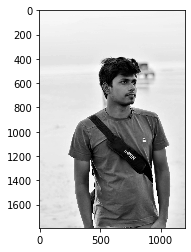

In [276]:
plt.imshow(img,cmap='gray')

In [277]:
print(img.shape)

(1792, 1196)


(50, 50)


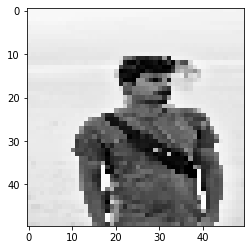

In [278]:
img_size=50
new=cv2.resize(img,(img_size,img_size))
plt.imshow(new,cmap='gray')
print(new.shape)
plt.show()

In [279]:
new=np.array(new).reshape(-1,img_size,img_size,1)
new=new/255.0

In [280]:
a=model.predict(new)

In [281]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
b=list(softmax(a))

In [282]:
b

[array([0.14514127, 0.14247645, 0.14247645, 0.14247645, 0.14247645,
        0.14247645, 0.14247645], dtype=float32)]